Разведывательный анализ данных (EDA)

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Рекомендации по выполнению проекта
1.Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа
2.Посмотрите на распределение признака для числовых переменных, устраните выбросы
3.Оцените количество уникальных значений для номинативных переменных
4.По необходимости преобразуйте данные
5.Проведите корреляционный анализ количественных переменных
6.Отберите не коррелирующие переменные
7.Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score)
8.Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели

Для начала загрузим эти данные и посмотрим на них

In [1]:
#Разведывательный анализ данных (EDA)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50)# показывать больше колонок

students = pd.read_csv('stud_math.csv')

#Для нашего удобства переименуем некоторые столбцы
students.rename(columns={'Pstatus': 'P_status', 'Medu': 'M_edu', 'Fedu': 'F_edu', 'Mjob': 'M_job',
                      'Fjob': 'F_job', 'studytime, granular': 'granular'}, inplace=True)

display(students.head(10))

,school,sex,age,address,famsize,P_status,M_edu,F_edu,M_job,F_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [6]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   P_status    350 non-null    object 
 6   M_edu       392 non-null    float64
 7   F_edu       371 non-null    float64
 8   M_job       376 non-null    object 
 9   F_job       359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

Количество столбцов - 30, строк - 395. Имеются данные числовые float64(12), int64(1) и строковые object(17). Так же есть не заполненные значения. Нет описания столбца 'studytime, granular'.

In [2]:
#Данные можно разбить на следующие виды:
#категориальный: 
students_cat=['M_edu','F_edu','M_job','F_job','reason','guardian','traveltime','studytime','failures','famrel', 'freetime','goout','health']
#бинарный:
students_bin=['school','sex','address','famsize','P_status','schoolsup','famsup','paid','activities','nursery','higher','internet', 'romantic']
#числовой:
students_num=['age','absences','score']

Посмотрим количество не заполненых значений

In [3]:
students.isnull().sum().sort_values(ascending=False)

P_status      45
paid          40
famsup        39
F_job         36
internet      34
romantic      31
guardian      31
traveltime    28
famsize       27
famrel        27
F_edu         24
failures      22
higher        20
M_job         19
reason        17
address       17
nursery       16
health        15
activities    14
absences      12
freetime      11
schoolsup      9
goout          8
studytime      7
granular       7
score          6
M_edu          3
age            0
sex            0
school         0
dtype: int64

Имеются 3 столбца полностью заполненых. Максимальное количество отсутствующих значений в столбце Pstatus — статус совместного жилья родителей - 45. 

Проверим данные на дублирование строк

In [4]:
len(students[students.duplicated(keep=False)==True])

0

Дублирование строк отсутствует

Рассмотрим все столбцы по отдельности.

Первый столбец: 'school'- аббревиатура школы, в которой учится ученик

count     395
unique      2
top        GP
freq      349
Name: school, dtype: object

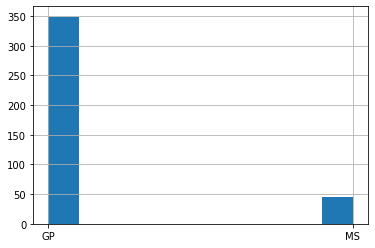

In [7]:
students.school.hist()
students.school.describe()

Количество уникальных значений -2, пропусков нет.

2.Sex — пол ученика

In [5]:
# Функция выводит информацию об уникальных значениях и пропусках
def info(column):
    print('Уникальных значений:',students[column].nunique())
    gap = len(students[students[column].isnull()])
    print('Пропусков:',gap)
    print('Процент пропусков:',round(gap/students.shape[0]*100))    

In [48]:
info('sex')

Уникальных значений: 2
Пропусков: 0
Процент пропусков: 0


Количество уникальных значений - 2, пропусков нет.

3.Age - возраст ученика

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

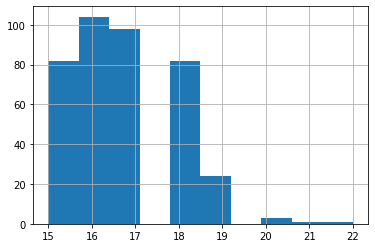

In [45]:
students.age.hist()
students.age.describe()

In [49]:
info('age')

Уникальных значений: 8
Пропусков: 0
Процент пропусков: 0


Рассмотрев гистограмму мы видим 2 разрыва между 17 - 18 и 19 - 20 годами, также видно малое количество учеников в возрасте старше 20 лет (или недостаточно данных по ним).

4.Address - тип адреса ученика

count     378
unique      2
top         U
freq      295
Name: address, dtype: object

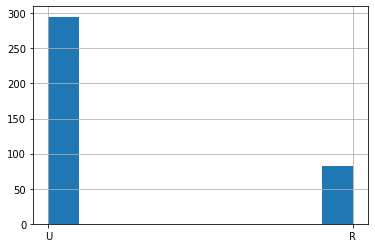

In [28]:
students.address.hist()
students.address.describe()

In [50]:
info('address')

Уникальных значений: 2
Пропусков: 17
Процент пропусков: 4


Количество уникальных значений - 2, пропусков - 17, что составляет 4 процента от общего объема данных. Нас это устраивает.

5.Famsize — размер семьи

In [51]:
info('famsize')

Уникальных значений: 2
Пропусков: 27
Процент пропусков: 7


Количество уникальных значений - 2, пропусков - 27, что составляет 7 процента от общего объема данных. Нас это устраивает.

6.Pstatus — статус совместного жилья родителей

In [6]:
info('P_status')

Уникальных значений: 2
Пропусков: 45
Процент пропусков: 11


Количество уникальных значений - 2, пропусков - 45, что составляет 11 процента от общего объема данных. Это достаточно большой процент, на что заменить пропущенные значения пока не ясно. 

count     350
unique      2
top         T
freq      314
Name: P_status, dtype: object

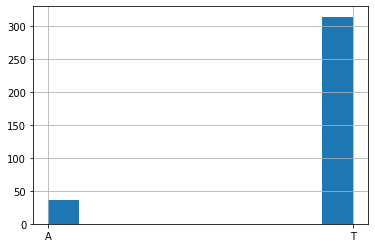

In [7]:
students.P_status.hist()
students.P_status.describe()

7.Medu — образование матери

In [67]:
info('M_edu')

Уникальных значений: 5
Пропусков: 3
Процент пропусков: 1


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: M_edu, dtype: float64

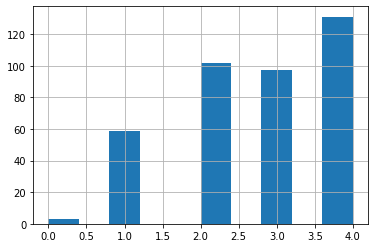

In [82]:
students.M_edu.hist()
students.M_edu.describe()

Количество уникальных значений - 5, пропусков - 3, что составляет 1 процента от общего объема данных. Нас это устраивает.

8.Fedu — образование отца

In [68]:
info('F_edu')

Уникальных значений: 6
Пропусков: 24
Процент пропусков: 6


count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: F_edu, dtype: float64

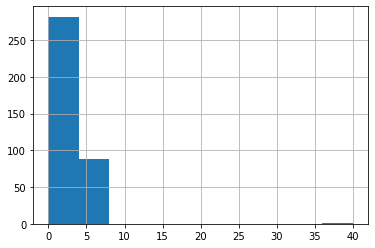

In [81]:
students.F_edu.hist()
students.F_edu.describe()

Количество уникальных значений - 6, пропусков - 24, что составляет 6 процента от общего объема данных. Странная гистограмма, максисальное значение 40, что выходит за рамки описания (от 0 до 4) и является выбросом.

In [8]:
students = students.loc[students.F_edu <= 4]

count    370.000000
mean       2.513514
std        1.087540
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: F_edu, dtype: float64

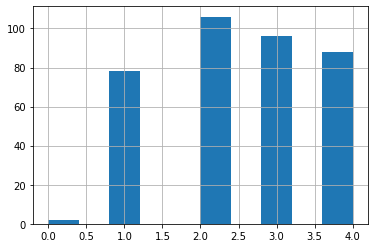

In [9]:
students.F_edu.hist()
students.F_edu.describe()

Теперь нас все устраивает.

9.Mjob — работа матери

In [69]:
info('M_job')

Уникальных значений: 5
Пропусков: 19
Процент пропусков: 5


Количество уникальных значений - 5, пропусков - 19, что составляет 5 процента от общего объема данных. Нас это устраивает.

10.Fjob — работа отца

In [70]:
info('F_job')

Уникальных значений: 5
Пропусков: 36
Процент пропусков: 9


Количество уникальных значений - 5, пропусков - 36, что составляет 9 процента от общего объема данных. Нас это устраивает.

11.Reason — причина выбора школы

In [71]:
info('reason')

Уникальных значений: 4
Пропусков: 17
Процент пропусков: 4


count        378
unique         4
top       course
freq         137
Name: reason, dtype: object

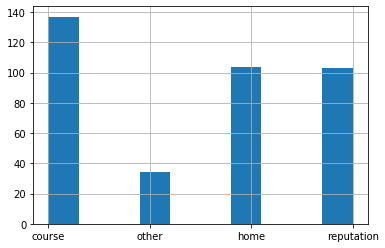

In [72]:
students.reason.hist()
students.reason.describe()

Количество уникальных значений - 4, пропусков - 17, что составляет 4 процента от общего объема данных. Нас это устраивает.

12.Guardian — опекун

In [73]:
info('guardian')

Уникальных значений: 3
Пропусков: 31
Процент пропусков: 8


count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object

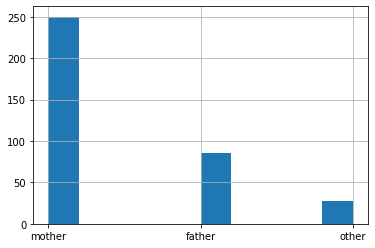

In [74]:
students.guardian.hist()
students.guardian.describe()

Количество уникальных значений - 3, пропусков - 31, что составляет 8 процента от общего объема данных. Нас это устраивает.

13.Traveltime — время в пути до школы 

In [75]:
info('traveltime')

Уникальных значений: 4
Пропусков: 28
Процент пропусков: 7


count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

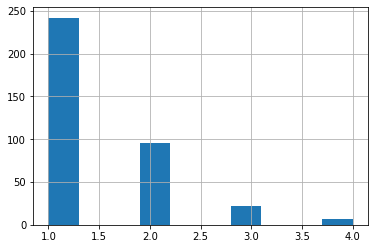

In [77]:
students.traveltime.hist()
students.traveltime.describe()

Количество уникальных значений - 4, пропусков - 28, что составляет 7 процента от общего объема данных. Нас это устраивает.

14.Studytime — время на учёбу помимо школы в неделю

In [76]:
info('studytime')

Уникальных значений: 4
Пропусков: 7
Процент пропусков: 2


count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

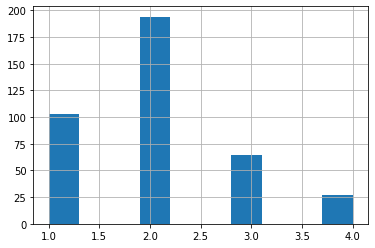

In [78]:
students.studytime.hist()
students.studytime.describe()

Количество уникальных значений - 4, пропусков - 7, что составляет 2 процента от общего объема данных. Нас это устраивает.

15.Failures — количество внеучебных неудач

In [79]:
info('failures')

Уникальных значений: 4
Пропусков: 22
Процент пропусков: 6


count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

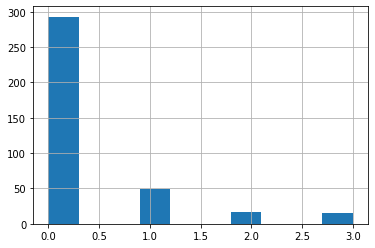

In [80]:
students.failures.hist()
students.failures.describe()

Количество уникальных значений - 4, пропусков - 22, что составляет 6 процента от общего объема данных. Нас это устраивает.

16.Schoolsup — дополнительная образовательная поддержка

In [83]:
info('schoolsup')

Уникальных значений: 2
Пропусков: 9
Процент пропусков: 2


Количество уникальных значений - 2, пропусков - 9, что составляет 2 процента от общего объема данных. Нас это устраивает.

17.Famsup — семейная образовательная поддержка

In [84]:
info('famsup')

Уникальных значений: 2
Пропусков: 39
Процент пропусков: 10


Количество уникальных значений - 2, пропусков - 39, что составляет 10 процента от общего объема данных. Нас это устраивает.

18.Paid — дополнительные платные занятия по математике

In [85]:
info('paid')

Уникальных значений: 2
Пропусков: 40
Процент пропусков: 10


Количество уникальных значений - 2, пропусков - 40, что составляет 10 процента от общего объема данных. Это достаточно большой процент, на что заменить пока не ясно.

19.Activities — дополнительные внеучебные занятия

In [90]:
info('activities')

Уникальных значений: 2
Пропусков: 14
Процент пропусков: 4


Количество уникальных значений - 2, пропусков - 14, что составляет 4 процента от общего объема данных. Нас это устраивает.

20.Nursery — посещал детский сад

In [91]:
info('nursery')

Уникальных значений: 2
Пропусков: 16
Процент пропусков: 4


Количество уникальных значений - 2, пропусков - 16, что составляет 4 процента от общего объема данных. Нас это устраивает.

21.Studytime, granular - нет в описании

In [93]:
info('granular')

Уникальных значений: 4
Пропусков: 7
Процент пропусков: 2


Количество уникальных значений - 2, пропусков - 16, что составляет 4 процента от общего объема данных. Посмотрим с чем эта колонка коррелирует.

In [10]:
students.corr()['granular'].sort_values()

studytime    -1.000000
score        -0.128166
M_edu        -0.095749
famrel       -0.046967
F_edu        -0.008603
age           0.015712
absences      0.018938
goout         0.035572
health        0.072996
traveltime    0.102425
freetime      0.118115
failures      0.159761
granular      1.000000
Name: granular, dtype: float64

Она обратно коррелирует с колонкой studytime, удаляем ее.

In [11]:
students.drop(['granular'],inplace=True,axis=1)

22.Higher — хочет получить высшее образование

In [98]:
info('higher')

Уникальных значений: 2
Пропусков: 18
Процент пропусков: 5


Количество уникальных значений - 2, пропусков - 18, что составляет 5 процента от общего объема данных. Нас это устраивает.

23.Internet — наличие интернета дома

In [99]:
info('internet')

Уникальных значений: 2
Пропусков: 33
Процент пропусков: 9


Количество уникальных значений - 2, пропусков - 33, что составляет 9 процента от общего объема данных. Нас это устраивает.

24.Romantic — в романтических отношениях

In [100]:
info('romantic')

Уникальных значений: 2
Пропусков: 28
Процент пропусков: 8


Количество уникальных значений - 2, пропусков - 28, что составляет 8 процента от общего объема данных. Нас это устраивает.

25.Famrel — семейные отношения

In [101]:
info('famrel')

Уникальных значений: 6
Пропусков: 24
Процент пропусков: 6


count    346.000000
mean       3.936416
std        0.939629
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

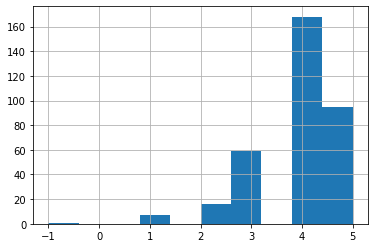

In [102]:
students.famrel.hist()
students.famrel.describe()

Количество уникальных значений - 6, пропусков - 24, что составляет 6 процента от общего объема данных. На гистограмме виден выброс, минимальное значение -1, что выходит за рамки описания от 1 до 5.

In [12]:
students = students.loc[students.famrel >= 1]

count    345.000000
mean       3.950725
std        0.902455
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

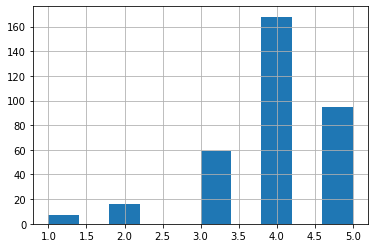

In [104]:
students.famrel.hist()
students.famrel.describe()

Так лучше

26.Freetime — свободное время после школы

In [105]:
info('freetime')

Уникальных значений: 5
Пропусков: 9
Процент пропусков: 3


count    336.000000
mean       3.229167
std        1.003508
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

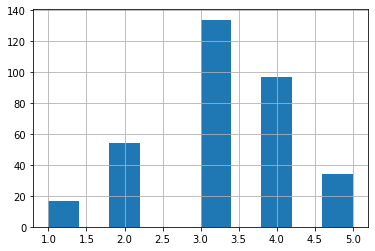

In [106]:
students.freetime.hist()
students.freetime.describe()

Количество уникальных значений - 5, пропусков - 9, что составляет 3 процента от общего объема данных. Нас это устраивает.

27.Goout — проведение времени с друзьями

In [107]:
info('goout')

Уникальных значений: 5
Пропусков: 8
Процент пропусков: 2


count    337.000000
mean       3.106825
std        1.104852
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

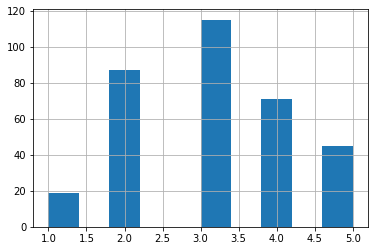

In [108]:
students.goout.hist()
students.goout.describe()

Количество уникальных значений - 5, пропусков - 8, что составляет 2 процента от общего объема данных. Нас это устраивает.

27.Health — текущее состояние здоровья

In [109]:
info('health')

Уникальных значений: 5
Пропусков: 13
Процент пропусков: 4


count    332.000000
mean       3.469880
std        1.386925
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

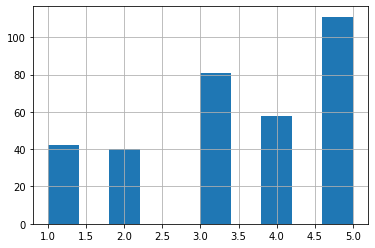

In [110]:
students.health.hist()
students.health.describe()

Количество уникальных значений - 5, пропусков - 13, что составляет 4 процента от общего объема данных. Нас это устраивает.

28.Absences — количество пропущенных занятий

In [13]:
info('absences')

Уникальных значений: 33
Пропусков: 12
Процент пропусков: 3


count    333.000000
mean       7.315315
std       24.755302
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

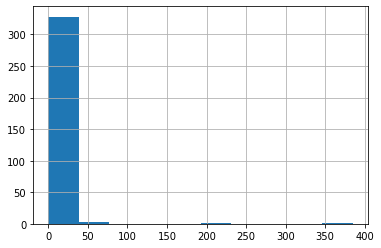

In [14]:
students.absences.hist()
students.absences.describe()

Количество уникальных значений - 33, пропусков - 12, что составляет 3 процента от общего объема данных. На гистограмме видены выбросы. Чтобы отфильтровать выбросы воспользоваться формулой интерквартильного расстояния.

In [15]:
#Функция выводит информацию о границах выбросов
def outliers(column,start,end,k=1.5,bins=10):
    col=students[column]
    median=col.median()
    IQR=col.quantile(0.75)-col.quantile(0.25)
    perc25=col.quantile(0.25)
    perc75=col.quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25),'75-й перцентиль: {},'.format(perc75),
          "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25-k*IQR,l=perc75+k*IQR))
    col.loc[col.between(perc25-k*IQR,perc75+k*IQR)].hist(bins=bins,range=(start,end),label='IQR')
    
    plt.legend()

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


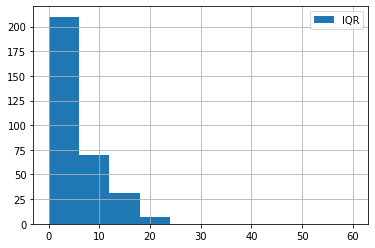

In [16]:
outliers('absences',0,60)

Отфильтруем лишние строки

In [17]:
students = students.loc[students.absences <= 30]

In [126]:
info('absences')

Уникальных значений: 27
Пропусков: 0
Процент пропусков: 0


count    327.000000
mean       5.048930
std        5.722954
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       28.000000
Name: absences, dtype: float64

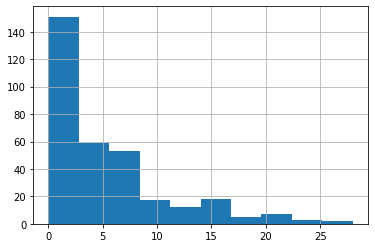

In [127]:
students.absences.hist()
students.absences.describe()

30.Score — баллы по госэкзамену по математике

In [18]:
info('score')

Уникальных значений: 18
Пропусков: 5
Процент пропусков: 2


Так как это наша целевая переменная удалим пропущенные строки.

In [19]:
students=students.loc[students.score.isnull()==False]

In [20]:
info('score')

Уникальных значений: 18
Пропусков: 0
Процент пропусков: 0


count    322.000000
mean      52.204969
std       22.519253
min        0.000000
25%       45.000000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

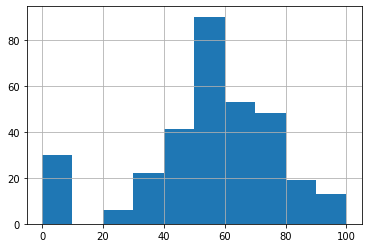

In [143]:
students.score.hist()
students.score.describe()

На гистограмме виден разрыв левее 20 балов. Так как 0 баллов означает отсутствие знаний по математике, отфильтруем эти значения. 

In [21]:
students = students.loc[students.score >= 20]

25-й перцентиль: 50.0, 75-й перцентиль: 70.0, IQR: 20.0,  Границы выбросов: [20.0, 100.0].


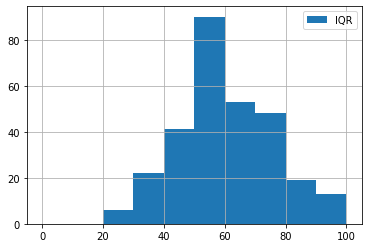

In [22]:
outliers('score',0,100)

На графике видно, что все значения попадают в границу выбросов. Это нас устраивает.

Корреляционный анализ

Проведем корреляционный анализ для числовых столбцов

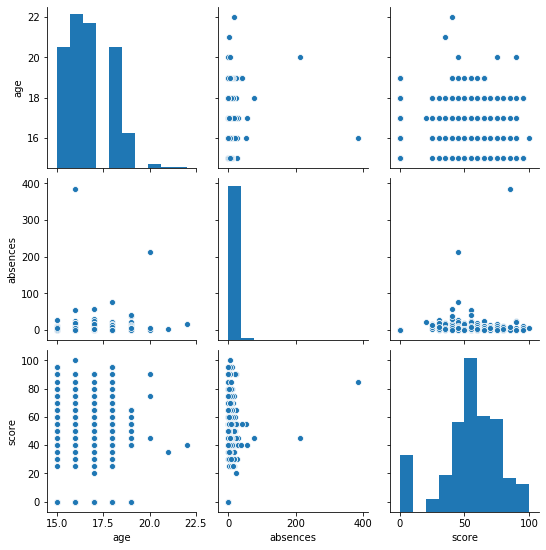

In [10]:
sns.pairplot(students_num)

In [11]:
students_num.corr()

,age,absences,score
age,1.000000,0.093592,-0.155726
absences,0.093592,1.000000,0.065283
score,-0.155726,0.065283,1.000000


Из проведенного анализа видно, что колонки age и absences слабо скоррелированы между собой. Их оставляем. Имеется небольшая обратная корреляция между age и score, чем выше age - тем меньше score.

Анализ номинативных переменных

In [23]:
#Функция показывает график плотности распределения переменных score
def get_boxplot(column):
    fig, ax =plt.subplots(figsize =(14, 4))
    sns.boxplot(x=column, y='score', 
                data=students.loc[students.loc[:, column].isin(students.loc[:, 
                    column].value_counts().index[:10])],ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for '+column)
    plt.show()

In [24]:
# тест Стьюдента
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

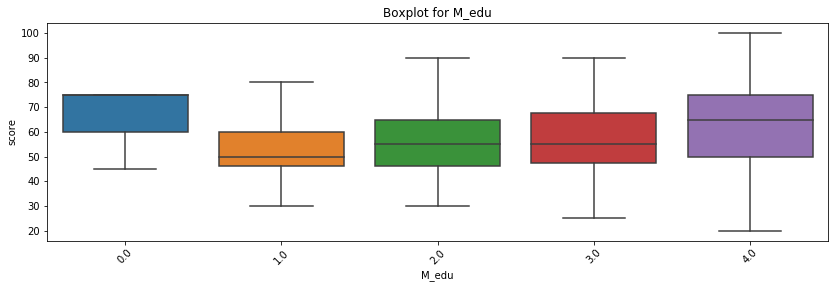

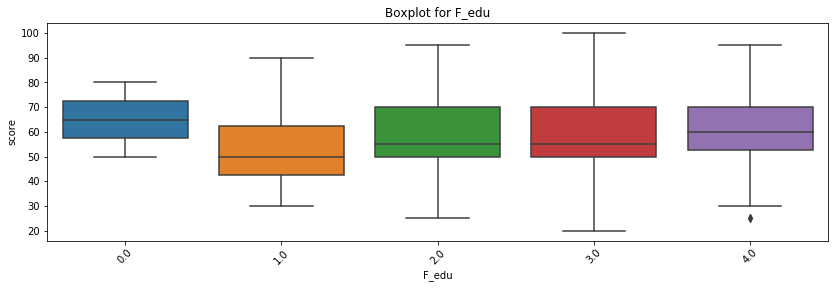

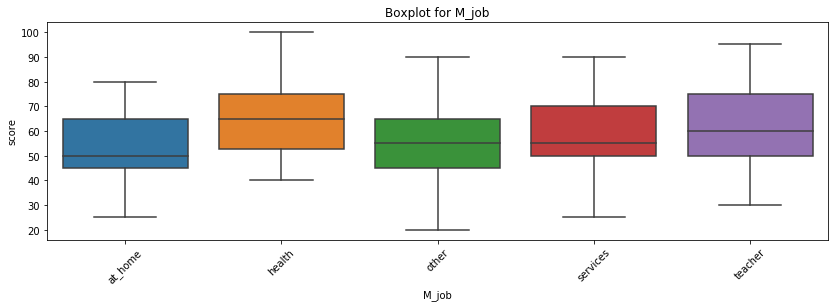

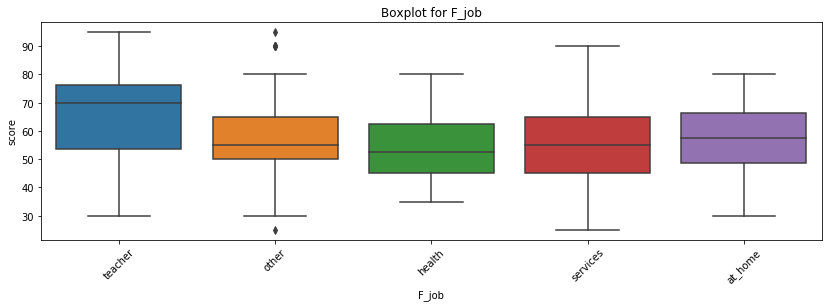

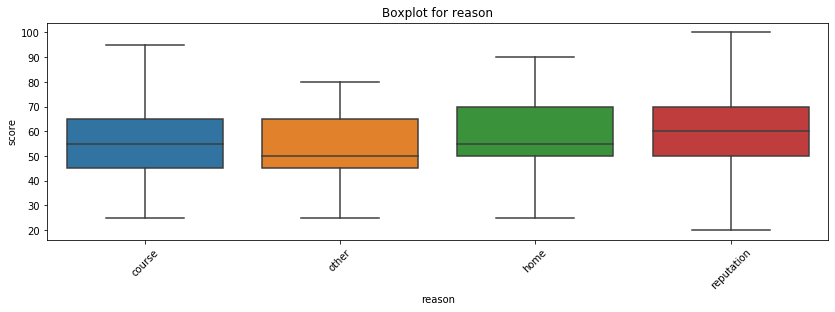

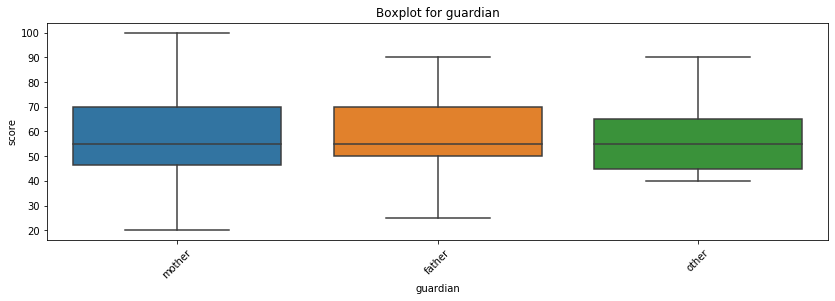

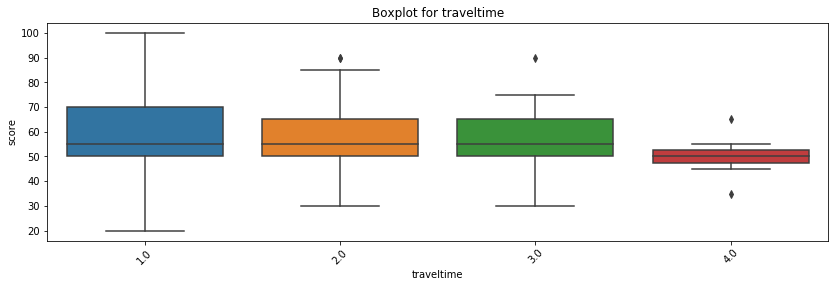

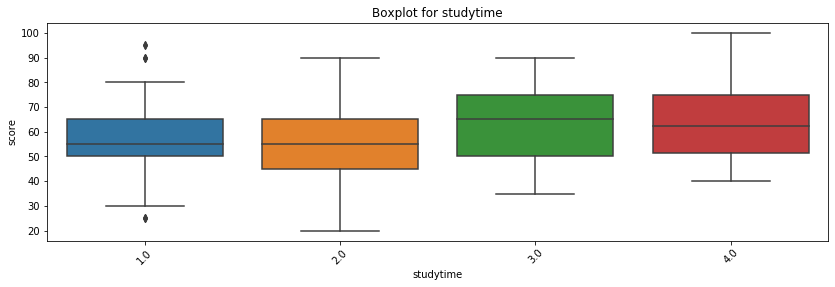

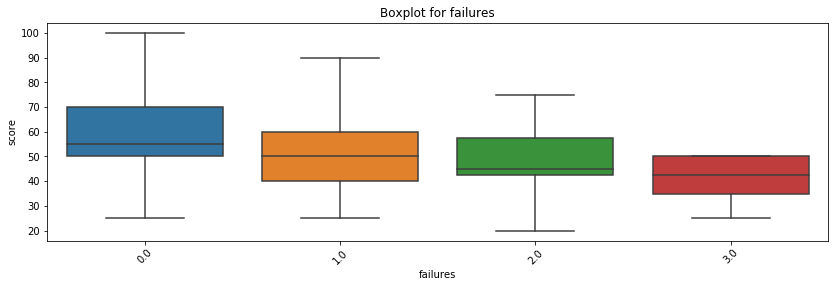

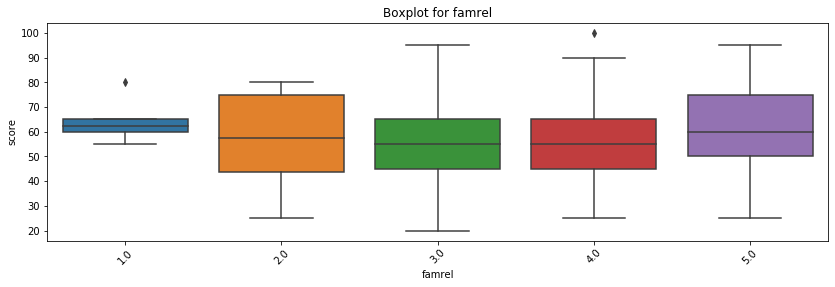

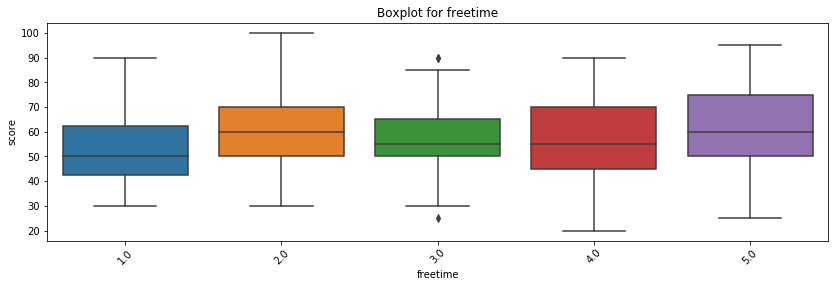

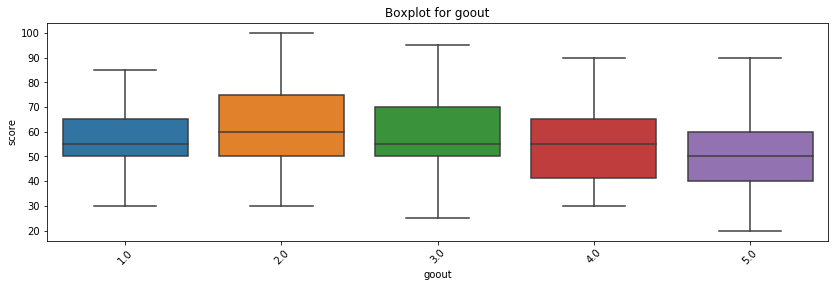

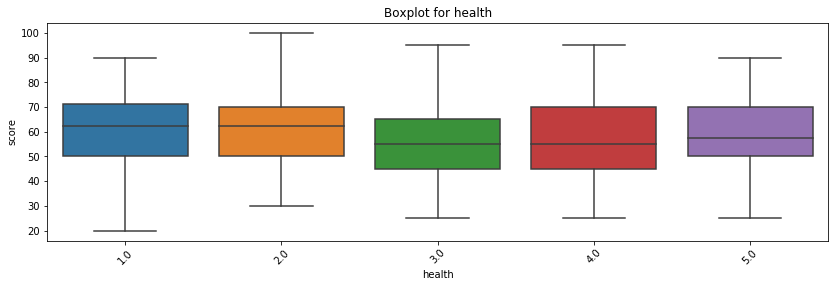

In [25]:
for col in students_cat:
    get_boxplot(col)

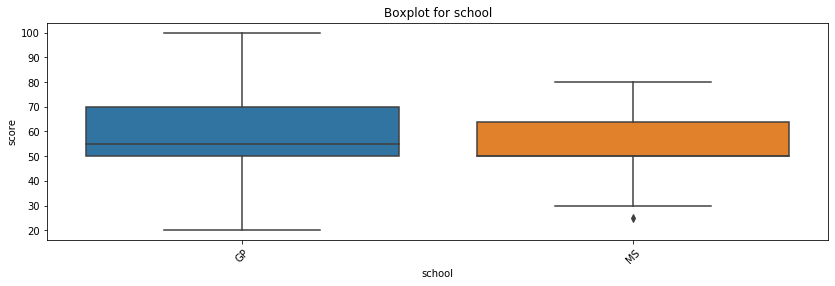

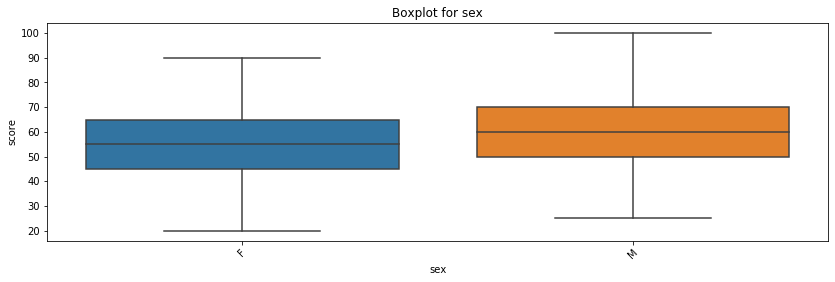

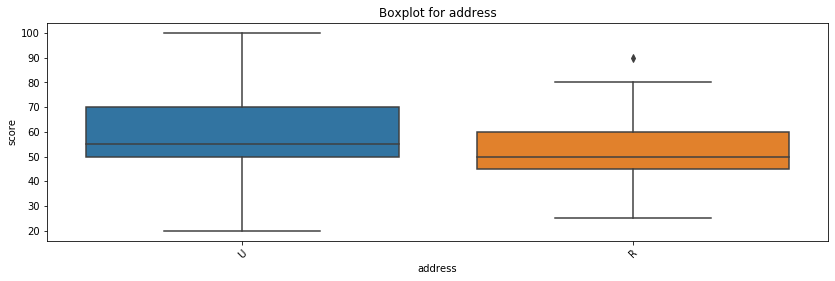

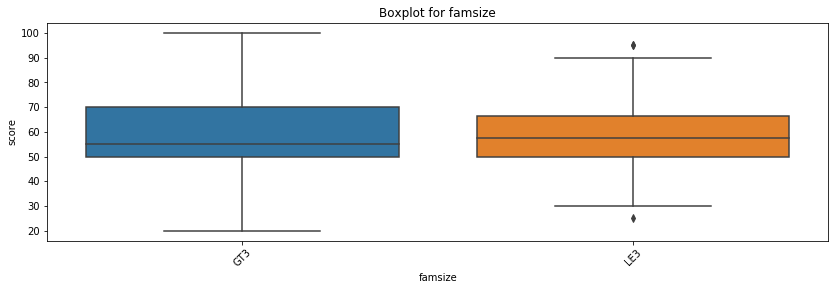

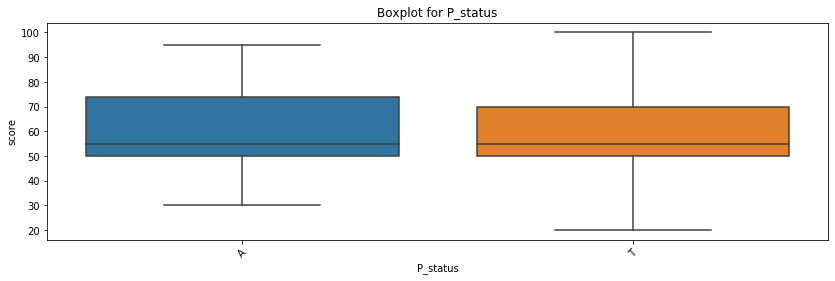

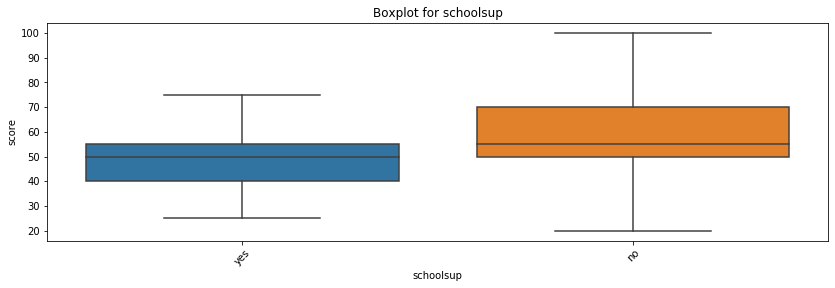

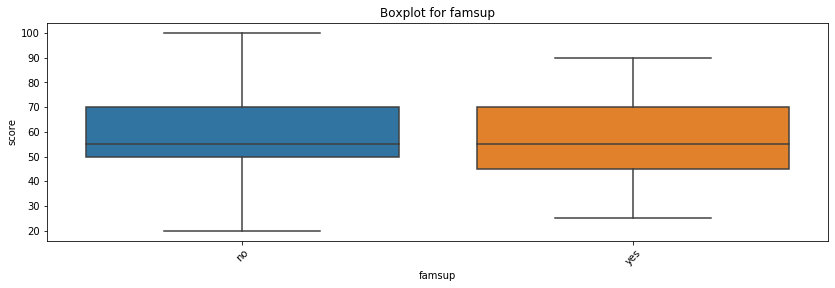

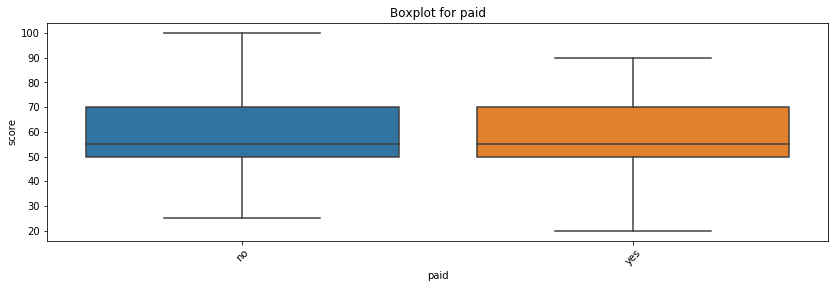

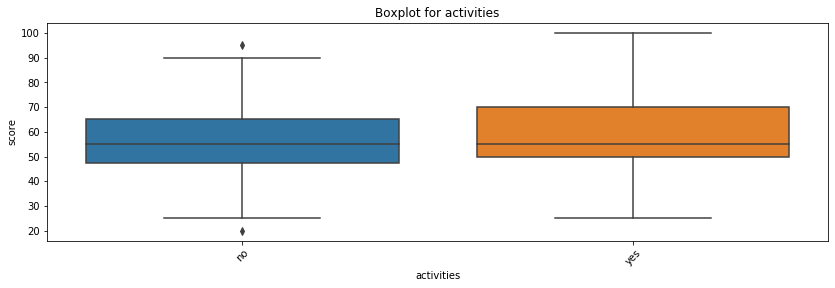

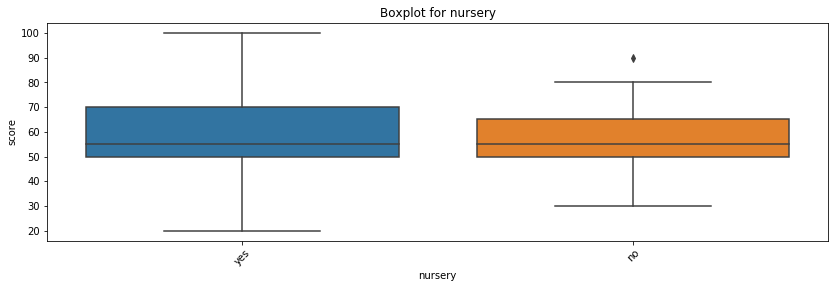

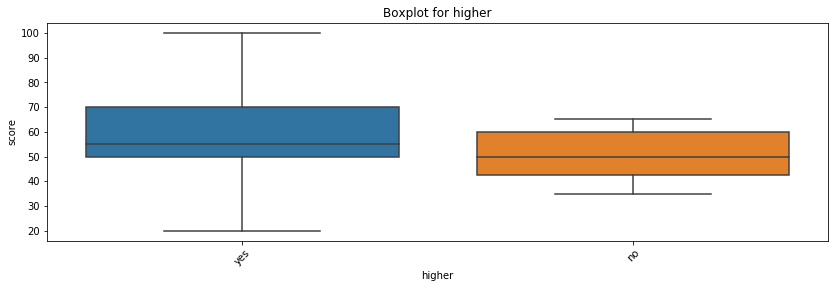

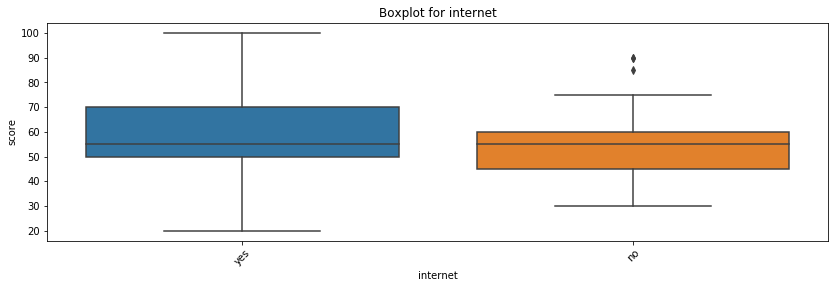

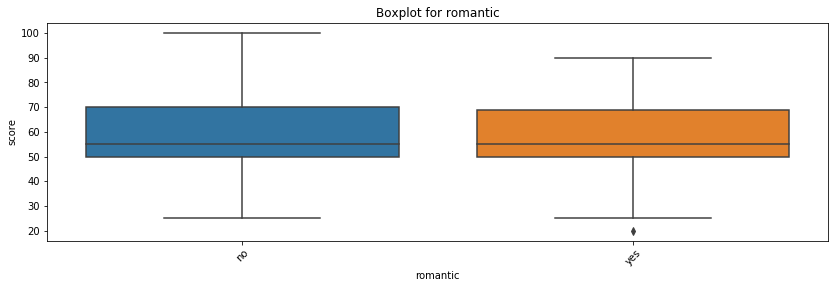

In [26]:
for col in students_bin:
    get_boxplot(col)

In [27]:
for col in students_cat:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки M_edu
Найдены статистически значимые различия для колонки M_job
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки goout


In [28]:
for col in students_bin:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки schoolsup


Из проведенного анализа видно, что статистически значимые различия имеют следующие колонки: M_edu, M_job, studytime, failures, goout, address, schoolsup.

Выводы

В результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике можно сделать следующие выводы:
1.Данные чистые. Колонки age, sex и school были заполнены полностью. Максимальный процент пропущенных значений 11%. Выбросы были обнаружены в колонках F_edu, famrel и absences.
2.Корреляция между числовыми параметрами не обнаружена.Отметим небольшую обратную корреляцию между возрастом и оценкой: чем выше возраст,тем меньше оценка.
3.Параметры, которые предлагается использовать в дальнейшем для построения модели: M_edu, M_job, studytime, failures, goout, address, schoolsup.

В итоге на для дальнейшего моделирования предлагается следующий датасет:

In [29]:
students_model=students.loc[:,['M_edu','M_job','studytime','goout','failures', 'schoolsup','address',
                               'age','absences','score']]

In [30]:
students_model.head()

,M_edu,M_job,studytime,goout,failures,schoolsup,address,age,absences,score
0,4.0,at_home,2.0,4.0,0.0,yes,U,18,6.0,30.0
1,1.0,at_home,2.0,3.0,0.0,no,U,17,4.0,30.0
2,1.0,at_home,2.0,2.0,3.0,yes,U,15,10.0,50.0
3,4.0,health,3.0,2.0,0.0,no,U,15,2.0,75.0
4,3.0,other,2.0,2.0,0.0,no,U,16,4.0,50.0


In [31]:
students_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 394
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   M_edu      290 non-null    float64
 1   M_job      276 non-null    object 
 2   studytime  287 non-null    float64
 3   goout      286 non-null    float64
 4   failures   275 non-null    float64
 5   schoolsup  283 non-null    object 
 6   address    282 non-null    object 
 7   age        292 non-null    int64  
 8   absences   292 non-null    float64
 9   score      292 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 25.1+ KB
